In [2]:
from load_sim_data import *
from load_shp import *
from sim_eval_pkg import *

Updated on 2025-10-13


In [3]:
sites_sn = [
    "AU-Pre",
    "AU-Sur",
    "CA-Sun",
    "FI-Kum",
    "FI-Tor",
    "FR-Cap",
    "GR-HEC",
    "JP-YOY",
    "KR-Jun",
    "KR-Och",
    "MX-Esc",
    "NL-Ams",
    "PL-Lip",
    "PL-Nar",
    "SG-Tel",
    "UK-Kin",
    "UK-Swi",
    "US-Bal",
    "US-Mi1",
    "US-Mi2",
    "US-Wes",
]

In [4]:
var_longname_dict={"Q*":'Net radiation',
                   "SWup":'Upward shortwave', 
                   "LWup":'Upward longwave', 
                   "Qh":'Sensible heat', 
                   "Qle":'Latent heat', 
                   "Qs":'Residual flux'}

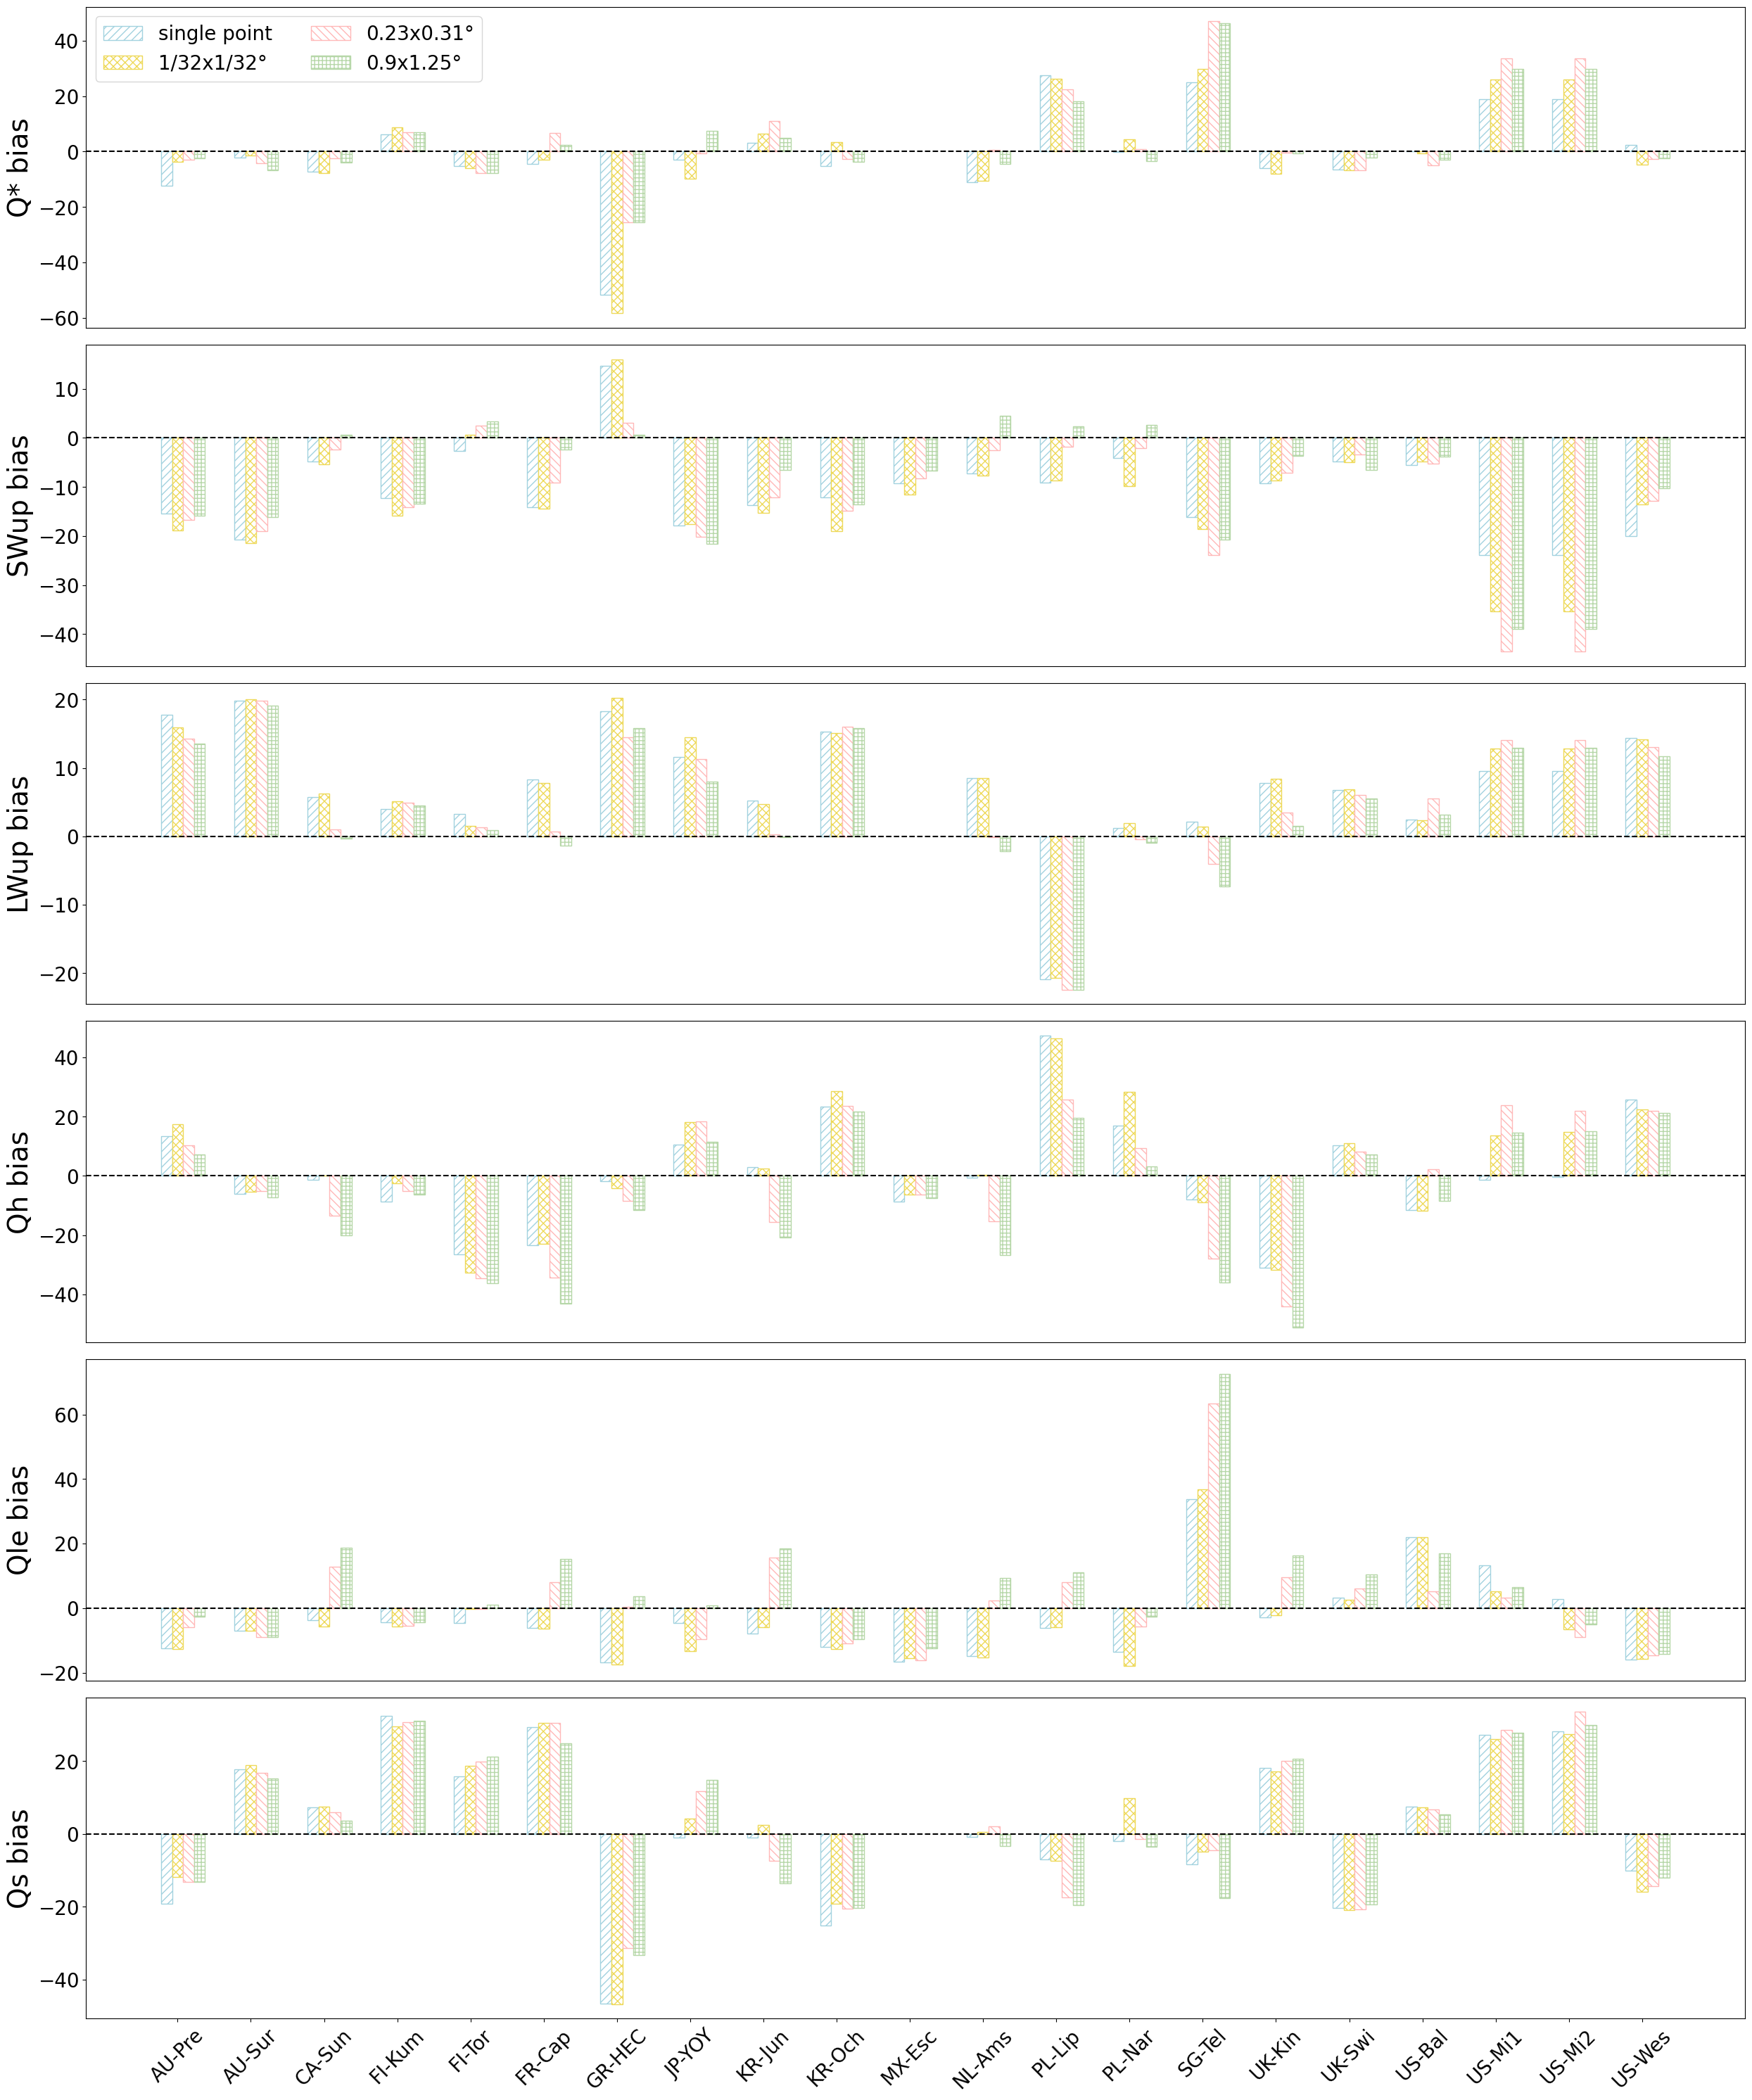

In [5]:
rad_vars = ["Q*", "SWup", "LWup", "Qh", "Qle", "Qs"]
fig,ax = plt.subplots(6,1,figsize=(25,30))
for i in range(6):
    var = rad_vars[i]
    var_bias_sp = pd.read_csv(
        f"/glade/work/yifanc17/02_data/03_urban_plumber/YC_{var}_bias_c250325.csv"
    )
    test_bias_sp = var_bias_sp["test"].tolist()

    var_bias_1d32deg = pd.read_csv(
        f"/glade/work/yifanc17/02_data/03_urban_plumber/YC_{var}_bias_test_1d32deg_c250310.csv"
    )
    test_bias_1d32deg = var_bias_1d32deg["test"].tolist()

    var_bias_025deg = pd.read_csv(
        f"/glade/work/yifanc17/02_data/03_urban_plumber/YC_{var}_bias_test_0.23x0.31_c250310.csv"
    )
    test_bias_025deg = var_bias_025deg["test"].tolist()

    var_bias_1deg = pd.read_csv(
        f"/glade/work/yifanc17/02_data/03_urban_plumber/YC_{var}_bias_test_0.9x1.25_c250310.csv"
    )
    test_bias_1deg = var_bias_1deg["test"].tolist()

    bar_width = 0.15
    ax[i].bar(
        np.arange(len(sites_sn)) - bar_width,
        test_bias_sp,
        width=bar_width,
        label="single point",
        ecolor="grey",
        color="white",
        edgecolor="#a2d2df",
        hatch="///",
    )
    ax[i].bar(
        np.arange(len(sites_sn)),
        test_bias_1d32deg,
        width=bar_width,
        label="1/32x1/32°",
        ecolor="grey",
        color="white",
        edgecolor="#eed959",
        hatch="xxx",
    )
    ax[i].bar(
        np.arange(len(sites_sn)) + bar_width,
        test_bias_025deg,
        width=bar_width,
        label="0.23x0.31°",
        ecolor="grey",
        color="white",
        edgecolor="#ffb8b8",
        hatch="\\\\\\",
    )
    ax[i].bar(
        np.arange(len(sites_sn)) + 2 * bar_width,
        test_bias_1deg,
        width=bar_width,
        label="0.9x1.25°",
        ecolor="grey",
        color="white",
        edgecolor="#b6d7a8",
        hatch="+++",
    )
    ax[i].axhline(y=0, color='k', linewidth=1.5, linestyle='--') 
    ax[i].tick_params(axis="y", which="major", labelsize=20)
    ax[i].set_ylabel(var + " bias", fontsize=28)
    ax[i].set_xticks([])
ax[0].legend(loc="upper left", ncol=2, bbox_to_anchor=(0, 1), prop={"size": 20})
ax[-1].set_xticks(np.arange(len(sites_sn)))
ax[-1].set_xticklabels(sites_sn, rotation=45, fontsize=20)
    
fig.tight_layout()